## **Insurance Claim Predictions with Backpropagation Neural Networks**
### By: Gabrielle Felicia Ariyanto

### **Exploratory Data Analysis & Data Pre-Processing**

In [2]:
# import all required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# store the insurance data into a variable named data
data = pd.read_csv('insurance.csv')

In [5]:
# view data
data

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [6]:
# view information for each column in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Insurance data has 9 columns, namely `age`, `sex`, `BMI`, `steps`, `children`, `smoker`, `region`, `charges`, and `insuranceclaim`.
The explanation regarding each column is as follows:
- `age` : age of the policy holder
- `sex`: the gender of the police holder (female = 0, male = 1)
- `bmi`: body mass index, provides an understanding of the body, high or low weight relative to height, objective index of body weight (kg/m ^ 2) using the ratio of height to body weight. The ideal BMI is 18.5 to 25.
- `steps`: average walking steps per day of the policyholder
- `children`: the number of children of the police holder
- `smoker`: smoking state of policyholder (non-smoke=0;smoker=1)
- `region`: area of residence of the policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
- `charges`: individual medical expenses billed by health insurance
- `insuranceclaim`: whether a policyholder claims insurance (yes=1, no=0)

All columns in the dataset have an integer data type except for the `bmi` and `charges` columns which have a float data type

#### Missing Values

In [7]:
# check whether there are missing values ​​in the data
data.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

The data has no missing value

#### Statistical Distribution of Data

In [10]:
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


- The `age` range of policy holders in this data is from 18 to 64 years old.
- The lowest policyholder `bmi` is 15.96 and the highest is 53.13. The average policyholder `bmi` in this data is 30.66.
-  The average daily steps of a policyholder (`steps`) ranges from 3000 to 10010.
- The number of children the policy holder has (`children`) is between 0 and 5 children.
- Policyholder medical costs billed by health insurance (`charges`) in this data range from 1121.873900 to 63770.428010.

#### Correlation Between Each Variable

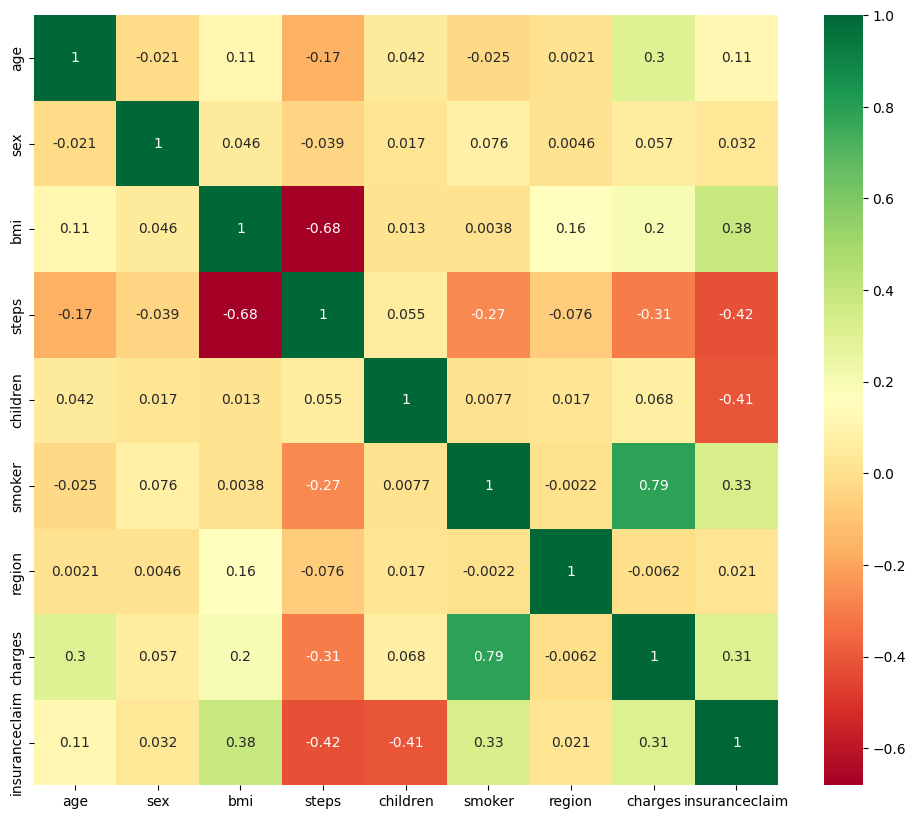

In [11]:
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

From the output above, the results show that the `bmi` column and `steps` column have a high negative correlation, namely -0.68 which indicates the presence of ***multicollinearity*** which can cause bias during later modeling. To overcome that, one of the columns must be removed.

I chose the ***`steps` column to be removed***, because the `bmi` column is more important than `steps` to predict whether someone will claim insurance or not. People with a high BMI are at risk of several health conditions related to obesity, thus influencing a person's decision to make an insurance claim.

In [12]:
# remove the steps column in the dataset
processed_dataset_1 = data.copy(deep=True)
processed_dataset_1 = processed_dataset_1.drop(['steps'], axis=1)

After the `steps` variable has been removed from the data, now the dataset only has 8 columns, namely 7 independent variables (`age`,`sex`,`bmi`,`children`,`smoker`,` region`, and `charges`) and 1 dependent variable (`insuranceclaim`).

The next problem with this dataset is that the values between ***each independent variable have a wide range of values***, so it is necessary to normalize the data. This time I used ***z-score to normalize the data***. The formula for *z-score normalization* is z = X - μ / σ.

Z-score normalization is a technique that normalizes attribute values based on the mean value and standard deviation. Normalization is carried out so that there is no dilution of data attributes that have a lower value scale with other attributes that have a larger scale value, even though perhaps attributes that have a lower value scale also have the same importance.

In [13]:
# normalize all independent variables
processed_dataset_final = processed_dataset_1.copy(deep=True)
processed_dataset_final['age'] = (processed_dataset_final['age']-processed_dataset_final['age'].mean())/processed_dataset_final['age'].std()
processed_dataset_final['sex'] = (processed_dataset_final['sex']-processed_dataset_final['sex'].mean())/processed_dataset_final['sex'].std()
processed_dataset_final['bmi'] = (processed_dataset_final['bmi']-processed_dataset_final['bmi'].mean())/processed_dataset_final['bmi'].std()
processed_dataset_final['children'] = (processed_dataset_final['children']-processed_dataset_final['children'].mean())/processed_dataset_final['children'].std()
processed_dataset_final['smoker'] = (processed_dataset_final['smoker']-processed_dataset_final['smoker'].mean())/processed_dataset_final['smoker'].std()
processed_dataset_final['region'] = (processed_dataset_final['region']-processed_dataset_final['region'].mean())/processed_dataset_final['region'].std()
processed_dataset_final['charges'] = (processed_dataset_final['charges']-processed_dataset_final['charges'].mean())/processed_dataset_final['charges'].std()

In [14]:
# check the condition of the data after normalization
processed_dataset_final.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,-1.438227,-1.010141,-0.453151,-0.908274,1.969850,1.343402,0.298472,1
1,-1.509401,0.989221,0.509431,-0.078738,-0.507273,0.438331,-0.953333,1
2,-0.797655,0.989221,0.383164,1.580335,-0.507273,0.438331,-0.728402,0
3,-0.441782,0.989221,-1.305043,-0.908274,-0.507273,-0.466741,0.719574,0
4,-0.512957,0.989221,-0.292447,-0.908274,-0.507273,-0.466741,-0.776512,1


In [15]:
# see the distribution of statistical data after normalization
processed_dataset_final.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000
mean,-1.672802e-16,-1.500212e-16,-2.124194e-16,-7.301915e-17,8.231250e-17,3.518196e-17,-7.700202e-17,0.585202
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492871
min,-1.509401e+00,-1.010141e+00,-2.411110e+00,-9.082741e-01,-5.072734e-01,-1.371813e+00,-1.003182e+00,0.000000
25%,-8.688299e-01,-1.010141e+00,-7.161386e-01,-9.082741e-01,-5.072734e-01,-4.667410e-01,-7.043871e-01,0.000000
50%,-1.473495e-02,9.892209e-01,-4.319265e-02,-7.873775e-02,-5.072734e-01,4.383307e-01,-3.210888e-01,1.000000
75%,8.393600e-01,9.892209e-01,6.609101e-01,7.507986e-01,-5.072734e-01,4.383307e-01,2.782401e-01,1.000000
max,1.764630e+00,9.892209e-01,3.684145e+00,3.239407e+00,1.969850e+00,1.343402e+00,4.170104e+00,1.000000


After normalizing the data, each variable in the data has a similar range of values.



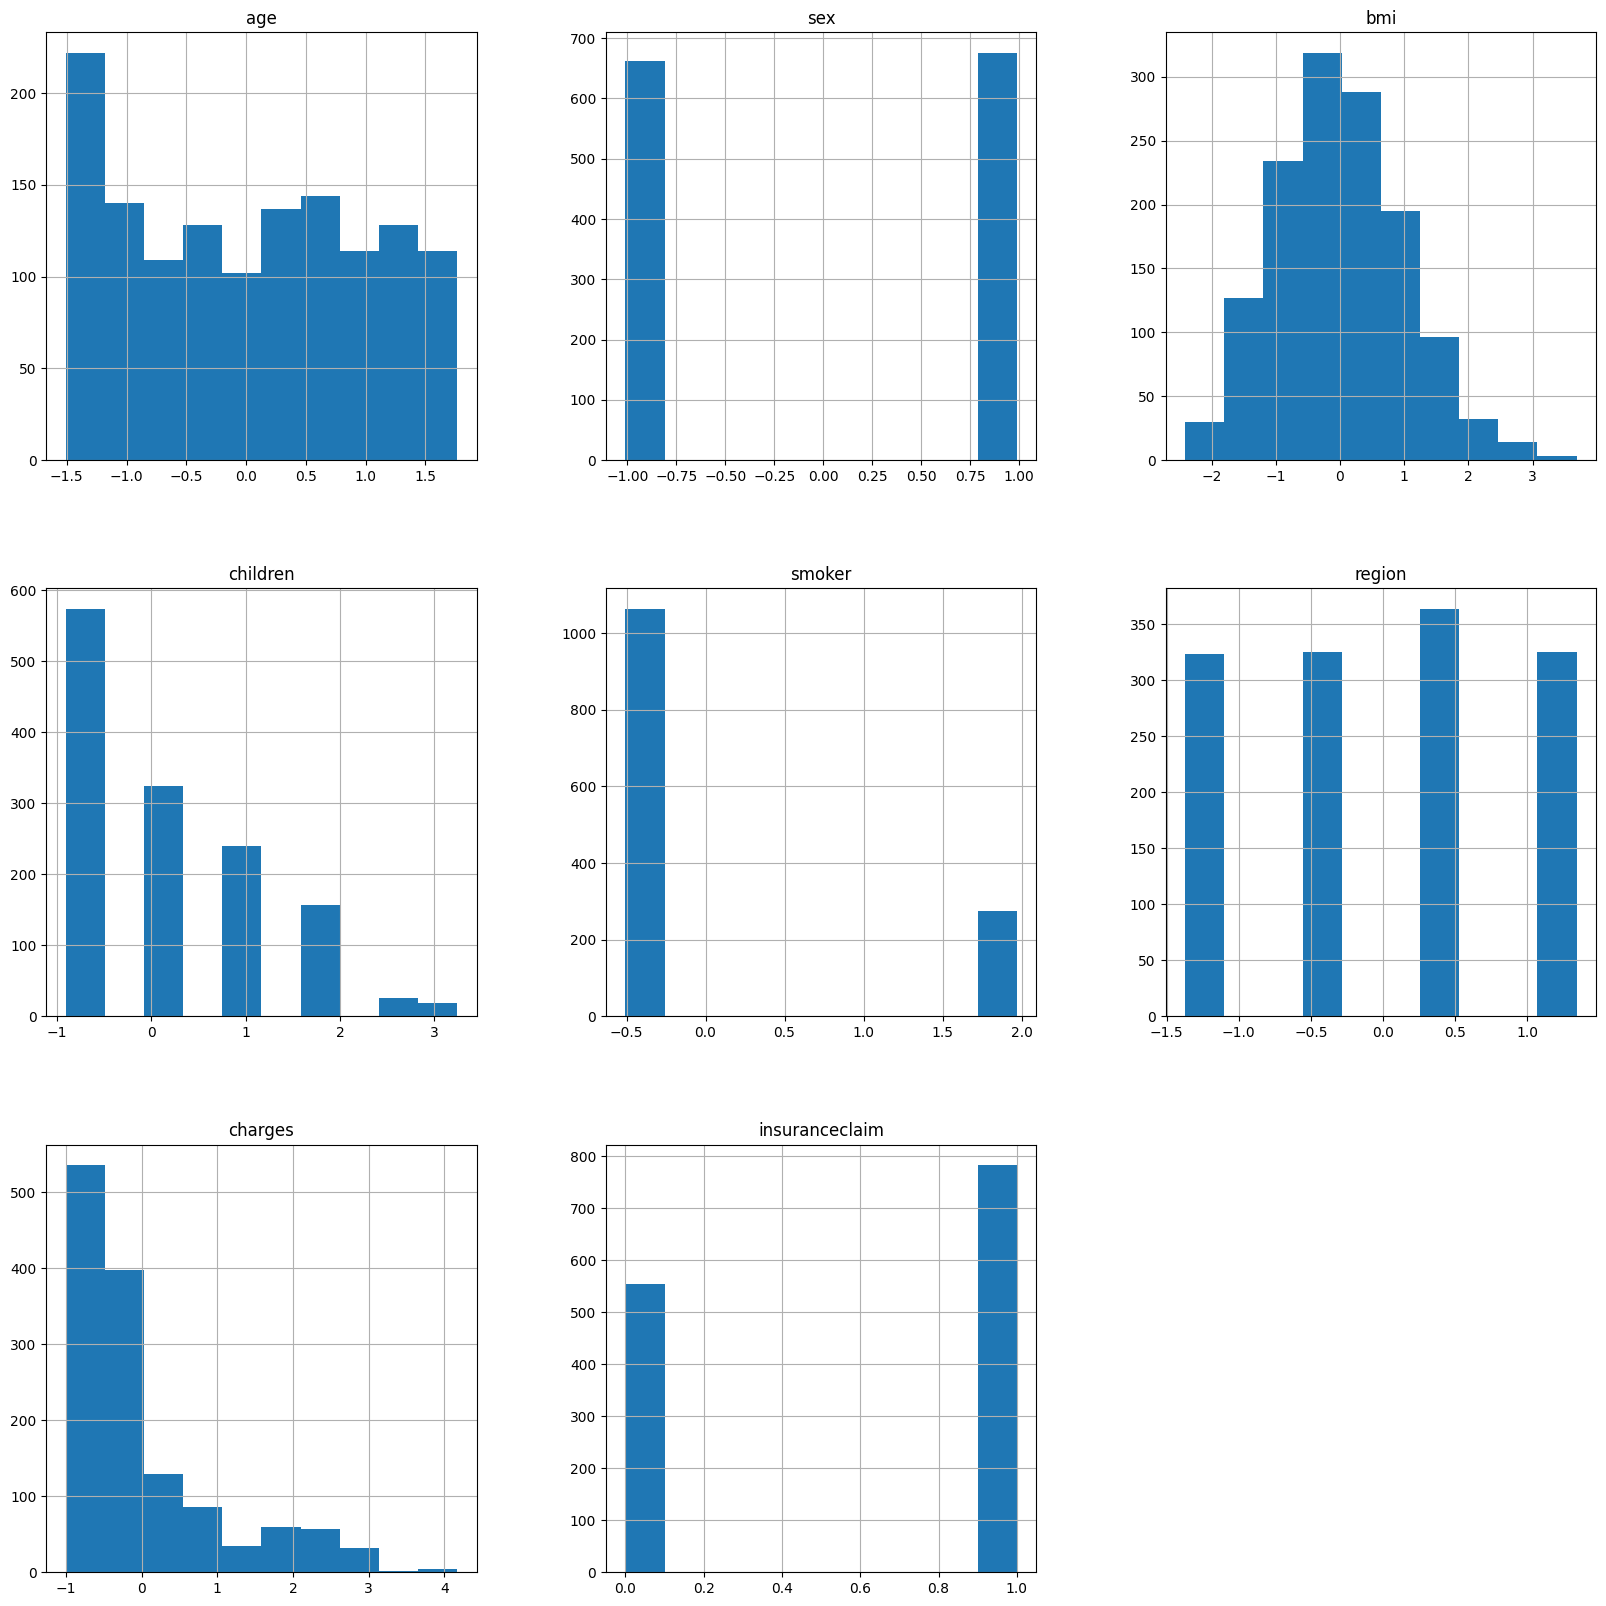

In [16]:
# see the histogram of each variable
x = processed_dataset_final.hist(figsize = (20,20))

From the output above, most variables do not have a normal distribution, with the exception of the variable `bmi` which has a distribution that resembles a normal distribution.

#### Exploration of Categorical Variables

##### Variabel `InsuranceClaim`

1    783
0    555
Name: insuranceclaim, dtype: int64


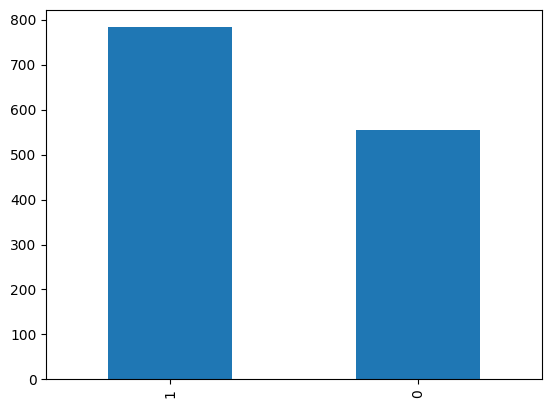

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["insuranceclaim"].map(lambda x: color_wheel.get(x + 1))
print(processed_dataset_final.insuranceclaim.value_counts())
z = processed_dataset_final.insuranceclaim.value_counts().plot(kind="bar")

The value of the dependent variable in this data or the `insuranceclaim` variable has unequal proportions. There were 783 policy holders who claimed insurance, while there were 555 people who did not claim insurance (more policy holders claimed insurance).

##### Variabel `sex`

1    676
0    662
Name: sex, dtype: int64


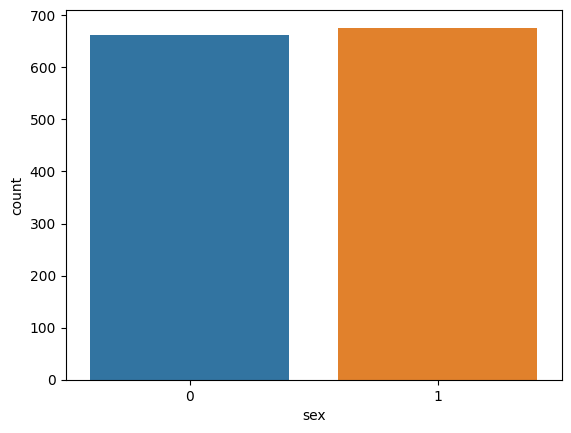

In [ ]:
print(data.sex.value_counts())
ax = sns.countplot(x ='sex', data = data)
ax.set_xlabel('sex')
plt.show()

The value of the `sex` variable has a fairly balanced proportion. There are 662 female policyholders and 676 male policyholders.

##### Variabel `smoker`

0    1064
1     274
Name: smoker, dtype: int64


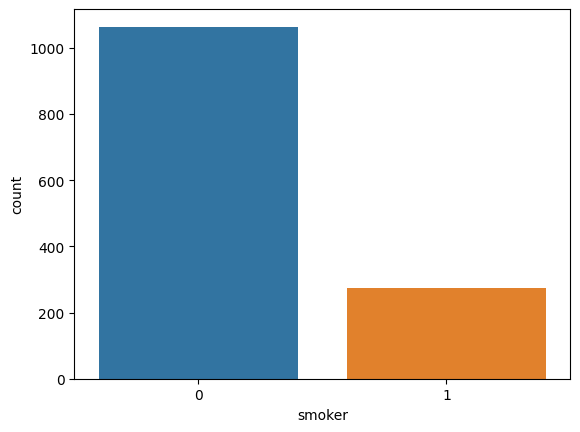

In [ ]:
print(data.smoker.value_counts())
ax = sns.countplot(x ='smoker', data = data)
ax.set_xlabel('smoker')
plt.show()

In this dataset, there are 1064 policyholders who do not smoke and 274 policyholders who smoke.

##### Variabel `region`

2    364
3    325
1    325
0    324
Name: region, dtype: int64


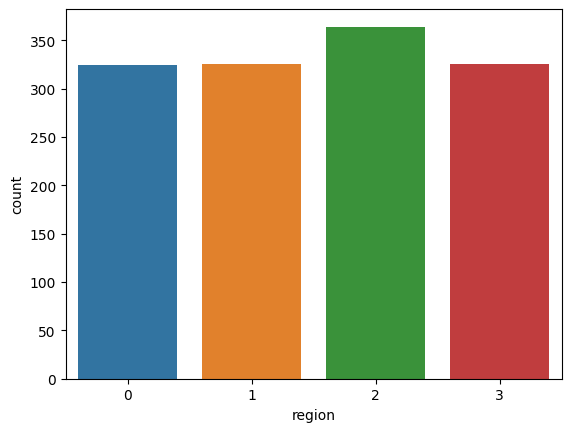

In [ ]:
print(data.region.value_counts())
ax = sns.countplot(x ='region', data = data)
ax.set_xlabel('region')
plt.show()

In this dataset, there are 364 policyholders living in the southeast region, 325 policyholders living in the southwest region, 325 policyholders living in the northwest region, and 324 policyholders living in the northeast region.

#### Exploration of numeric variables

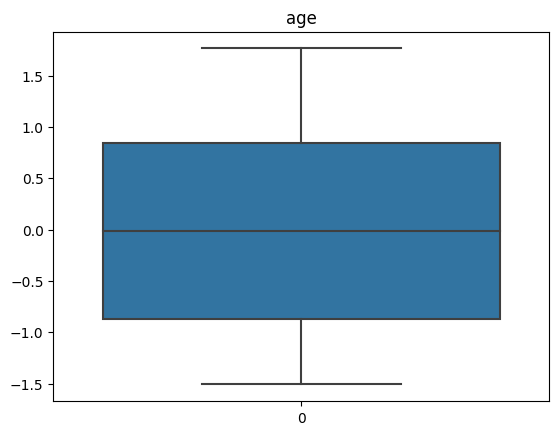

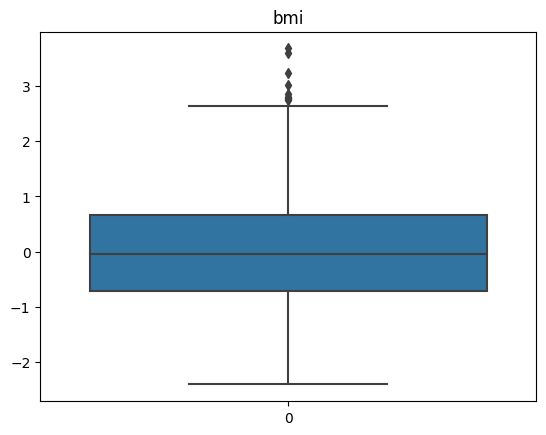

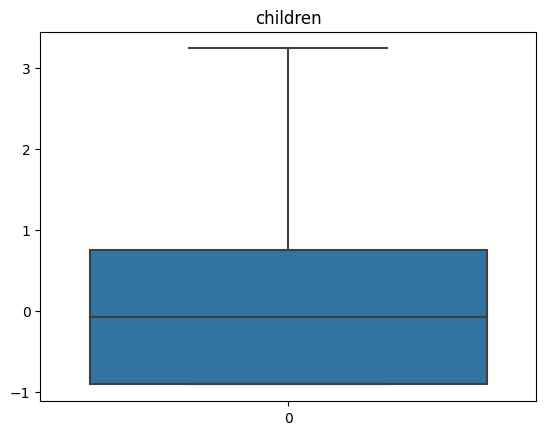

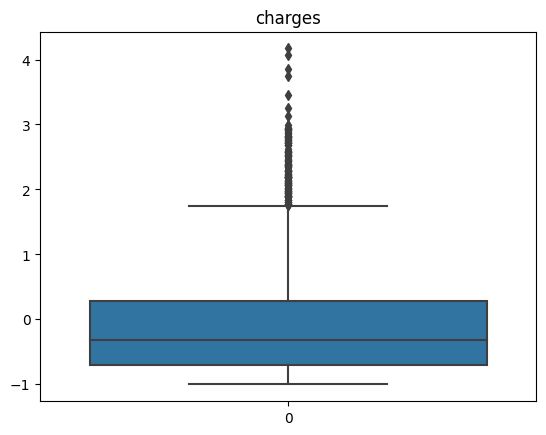

In [ ]:
# look at the boxplot on each numeric variable
numerical_columns = processed_dataset_final[['age','bmi','children','charges']]
for i in numerical_columns.columns:
    sns.boxplot(data= numerical_columns[i])
    plt.title(i)
    plt.show()

From the output above, the results show that there are outliers in the `charges` and `bmi` variables. However, these outliers are still considered reasonable, which means that in this dataset there are policyholders who have a "BMI" more than the average (obesity) and there are policyholders who have medical bills that are more than the average should be (may be experiencing something conditions that cause the policy holder to have medical treatment that requires a lot of money, for example being seriously ill, etc.)

### **Data Splitting**

In [ ]:
# import library required for data splitting
import tensorflow as tf
from sklearn.model_selection import train_test_split

# takes all independent columns with indices 0-6 and puts them into variable x
x = processed_dataset_final[processed_dataset_final.columns[0:7]].values
# takes the dependent column with the 7th index and puts it in the y variable
y = processed_dataset_final[processed_dataset_final.columns[7]].values
y = tf.keras.utils.to_categorical(y)

In [ ]:
# split the data into training set 80%, validation set 10% and testing set 10%
train_size = 0.80
val_size = 0.10
test_size = 0.10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1-train_size, random_state = 111)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size= test_size/(val_size+test_size), random_state = 111)

# check the size of each training, validation and testing set
print('x_train: ',len(x_train), "data")
print('x_val: ',len(x_val), "data")
print('x_test: ', len(x_test), "data")
print('===================')
print('y_train: ',len(y_train), "data")
print('y_val: ',len(y_val), "data")
print('y_test: ', len(y_test), "data")

x_train:  1070 data
x_val:  134 data
x_test:  134 data
y_train:  1070 data
y_val:  134 data
y_test:  134 data


### **Modeling**

Hereby, I create a model 1 with 7 inputs, 2 hidden layers with 2*7 nodes each, and 2 output layers. With Relu as activation function on each hidden layer and output layer

This model 1 is stored in a variable named `arsitektur_baseline`

In [ ]:
# import the required libraries
import tensorflow as tf
from tensorflow import keras

arsitektur_baseline = keras.Sequential([
    keras.layers.Dense(14, activation=tf.nn.relu, input_shape=(7,)),
    keras.layers.Dense(14, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.relu)
])

In [ ]:
# compile `arsitektur_baseline` model
arsitektur_baseline.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.optimizers.SGD(learning_rate = 0.01), metrics=["accuracy"])
# fit `arsitektur_baseline` model on the data training
arsitektur_baseline.fit(x_train, y_train, epochs=5, batch_size=16)

Epoch 1/5
67/67 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.5065
Epoch 2/5
67/67 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5299
Epoch 3/5
67/67 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5533
Epoch 4/5
67/67 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5720
Epoch 5/5
67/67 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5897


In [ ]:
# see the performance of the `arsitektur_baseline` model on data testing
arsitektur_baseline_result = arsitektur_baseline.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", arsitektur_baseline_result)

5/5 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6119
[test loss, test accuracy]: [0.6706939935684204, 0.611940324306488]


Model 1 or `arsitektur_baseline` model has an accuracy of around 61% on testing data

The following is an overview of the neural network from the model 1:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


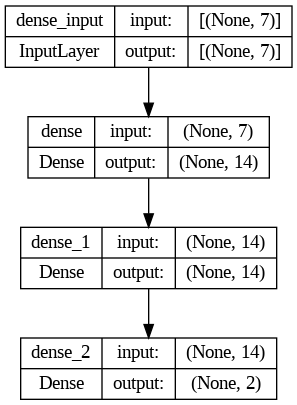

In [ ]:
!pip install pydot
tf.keras.utils.plot_model(arsitektur_baseline, to_file = 'baseline.png', show_shapes = True, show_layer_names = True)

Model 1 has 1 input layer with 7 nodes. Then it has 2 hidden layers with 14 nodes each and 1 output layer with 2 nodes. The baseline architecture uses the ReLu activation function on each layer.

### **Tuning the Model**

In [ ]:
# create a function to perform tuning
def build_model(hp_tune):
    # Enter 7 input layers and 14 hidden layers
    model = keras.models.Sequential([keras.layers.Dense(14, activation=tf.nn.relu, input_shape=(7,))])
    # next hidden layer tuning from 1-6: tuning the number of layers and the number of nodes per layer with a value between 4 to 64 in multiples of 4
    for i in range(hp_tune.Int('num_layers',1,6)):
      model.add(keras.layers.Dense(hp_tune.Int(f'node_layer{i}', min_value=4, max_value=64, step=4), activation=tf.nn.relu))
    # tuning activation function on output layer with relu or softmax
    model.add(keras.layers.Dense(2, activation=hp_tune.Choice('out_activation',['relu', 'softmax'])))
    # tuning learning rate between 0.0001 to 0.1
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.optimizers.SGD(learning_rate=hp_tune.Float("lr", min_value=1e-4, max_value=0.1, sampling='log')), metrics=["accuracy"])
    return model

In [ ]:
!pip install keras-tuner
import keras_tuner

# looking for the best value from the tuning results
tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_accuracy",
    max_epochs=50,
    directory="tuning_model10",
    project_name="tuning_model10",
)

tuner.search(x_train, y_train,validation_data=(x_val, y_val))

Trial 90 Complete [00h 00m 11s]
val_accuracy: 0.7985074520111084

Best val_accuracy So Far: 0.9701492786407471
Total elapsed time: 00h 05m 06s


The best accuracy value for data validation using the new hyperparameters is around 97%.

In [ ]:
# looking for the best parameter results that can be used by the model in order to produce high accuracy
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
num hidden layers: {best_hps.get('num_layers')}
lr: {best_hps.get('lr')}
out_activation: {best_hps.get('out_activation')}
nodes: {[f"hidden layer {x}: {best_hps.get(f'node_layer{x}')}" for x in range(best_hps.get('num_layers'))]}
""")


num hidden layers: 1
lr: 0.08010397509696619
out_activation: softmax
nodes: ['hidden layer 0: 36']



After tuning, the results obtained are:
- The next number of hidden layers (after the 14 input layers and hidden layers) is 1 with 36 nodes.
- A good learning rate to use is 0.08
- The activation function on the output layer should use softmax and not Relu

In [ ]:
# create a model with the new hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# take the epoch that yields the highest accuracy
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch))+1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
34/34 [==============================] - 1s 8ms/step - loss: 0.6518 - accuracy: 0.6617 - val_loss: 0.5994 - val_accuracy: 0.7537
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.7561 - val_loss: 0.5208 - val_accuracy: 0.7836
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.8196 - val_loss: 0.4407 - val_accuracy: 0.8433
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8551 - val_loss: 0.3765 - val_accuracy: 0.8657
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8710 - val_loss: 0.3324 - val_accuracy: 0.8955
Epoch 6/50
34/34 [==============================] - 0s 6ms/step - loss: 0.3387 - accuracy: 0.8804 - val_loss: 0.3040 - val_accuracy: 0.9030
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 0.3196 - accuracy: 0.8963 - val_loss: 0.2821 - val_accuracy: 0.8881
Epoch 8/50
34/34 [==

In [ ]:
# build a new model again using the epoch result that yields the highest accuracy
hypermodel = tuner.hypermodel.build(best_hps)

# re-train model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_data = (x_val, y_val))
hypermodel.summary()

Epoch 1/32
34/34 [==============================] - 1s 7ms/step - loss: 0.6794 - accuracy: 0.5636 - val_loss: 0.6270 - val_accuracy: 0.6567
Epoch 2/32
34/34 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.6813 - val_loss: 0.5634 - val_accuracy: 0.6940
Epoch 3/32
34/34 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7495 - val_loss: 0.4911 - val_accuracy: 0.7761
Epoch 4/32
34/34 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8093 - val_loss: 0.4142 - val_accuracy: 0.8731
Epoch 5/32
34/34 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8607 - val_loss: 0.3514 - val_accuracy: 0.9104
Epoch 6/32
34/34 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8794 - val_loss: 0.3189 - val_accuracy: 0.9179
Epoch 7/32
34/34 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8935 - val_loss: 0.2981 - val_accuracy: 0.8955
Epoch 8/32
34/34 [==

The following is an overview/architecture of the tuned model:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


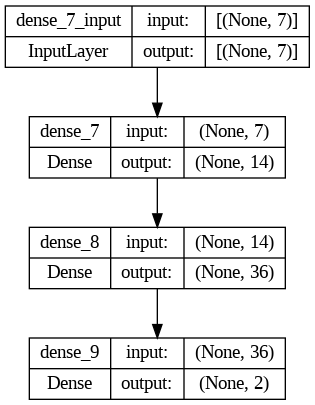

In [ ]:
!pip install pydot
tf.keras.utils.plot_model(hypermodel, to_file = 'baseline.png', show_shapes = True, show_layer_names = True)

An explanation of the above architecture is below.

In [ ]:
# Check out the performance of the tuned model
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

5/5 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.9328
[test loss, test accuracy]: [0.255817711353302, 0.9328358173370361]


Model that use tuning result parameters produce 93% accuracy on data testing. This shows that the tuned model produces higher accuracy than model 1 (`arsitektur_baseline`).

**Explanation of the tuned model from model 1 (`arsitektur_baseline`):**

In modifying the baseline architecture, I use **parameter tuning approach** using **Hyperband** to find the best hyperparameter. Next, I rebuilt the model using the hyperparameter tuning results. I do tuning as an approach method to produce a higher model accuracy than the model 1 (`arsitektur_baseline`) because tuning will help produce the best parameters to produce an optimal model with better performance. Tuning can also help avoid overfitting or underfitting.

In the process of searching for the best parameters, I did **tuning on the number of hidden layers, number of nodes in each hidden layer, activation function on the output layer, learning rate and number of iterations/epochs.**

**Tuned model have the following architectures:**
- **1 input layer with 7 nodes.**
- **Hidden layer 1 with 14 nodes**
- **Hidden layer 2 with 36 nodes**
- **1 Output layer with 2 nodes with activation function softmax**
- **Learning rate = 0.08**
- **Number of epochs = 32**

### **Model Evaluation**

#### Model 1 Evaluation (Model `arsitektur_baseline`)

In [ ]:
# import library to evaluate the model
from sklearn.metrics import classification_report

# make predictions on data testing using model 1
y_predict_baseline = arsitektur_baseline.predict(x_test)

# prediction results using the model 1
print(classification_report([np.argmax(y) for y in y_test], [np.argmax(y) for y in y_predict_baseline]))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.52      0.56      0.54        54
           1       0.68      0.65      0.67        80

    accuracy                           0.61       134
   macro avg       0.60      0.60      0.60       134
weighted avg       0.62      0.61      0.61       134



The first model (`arsitektur_baseline`) evaluation results are obtained as above:
- Accuracy of the `arsitektur_baseline` model is 61%
- The precision value (weighted avg) in the `arsitektur_baseline` model is 62%
- The recall value (weighted avg) on the `arsitektur_baseline` model is 61%
- The f1-score (weighted avg) value on the `arsitektur_baseline` model is 61%

#### Tuned Model Evaluation

In [ ]:
# make predictions on data testing using the tuned model
y_predict = hypermodel.predict(x_test)

# prediction results using the tuned model
print(classification_report([np.argmax(y) for y in y_test], [np.argmax(y) for y in y_predict]))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.99      0.90      0.94        80

    accuracy                           0.93       134
   macro avg       0.93      0.94      0.93       134
weighted avg       0.94      0.93      0.93       134



The tuned model (`hypermodel`), the results are obtained as above:
- Accuracy on the tuned model (`hypermodel`) is 93%
- The precision value (weighted avg) on the `hypermodel` is 94%
- The recall value (weighted avg) on the tuned model (`hypermodel`) is 93%
- The f1-score value (weighted avg) on the `hypermodel` is 93%

**Explanation:**

In this insurance data, the distribution of classes in the `insuranceclaim` variable (target variable) is not balanced, so we cannot assess the model's performance using its accuracy value alone. In this case, one of the measuring tools that we can use to judge whether a model is good or not is the value of the f1-score and precision. This is because it is better to predict someone not claiming insurance even though he originally claimed insurance. Otherwise, it can cause losses to the company.

The precision value is the ratio of positive correct predictions compared to the overall positive predicted results. The recall value is the ratio of correctly positive predictions compared to all of the correctly positive data. And the f1-score is the harmonic average of precision and recall.

Of the two models above, **the better or best model (best model) is the model that has been tuned** because it has higher precision and f1-score values than the model 1. Apart from that, the accuracy and recall values of the tuned model are also higher compared to the model 1. The model that has been tuned is a model that has 1 input layer with 7 nodes, 2 hidden layers with the number of nodes in each hidden layer being 14 and 36, and 1 output layer with 2 nodes, learning rate of 0.08, using softmax as an activation function in the output layer, and the number of epochs is 32.